In [4]:
import pandas as pd

In [5]:
#Hospitalization_Discharge
df0 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=0)
#CardiacComplications
df1 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=1)
#Responsivenes
df2 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=2)
#PatientHistory
df3 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=3)
#Labs
df4 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=4)
#Demography
df5 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=5)
#Patient_Precriptions
df6 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=6)

In [ ]:
34	get the last letter of discharge_department of patients using RegEX
35	find the way to reverse string for given input (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)
37	Using dischargeDay values print even if it even number and odd if it odd number
38	find the length of Tuple for any given input (Hint: Input a string from user )
40	Select 25 different random values between 200 to 800.
41	Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months
47	Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.
48	Using loops, create a multiplication table for the number 7

44	Based on Q26 and 27 display all demographic details of patients who are born in year 1945
36	Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() ** ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** ** Plot (x,y) on that axes and set the labels.


### Question#33	Retrieve the row with minimum white_blood_cell count using sorting technique.

In [104]:
#sorting using sort_values method
df4 = df4.sort_values('white_blood_cell')

#retriving the values from the first row after sorting, gives the minimum row value
df4.head(1)

#retriving the first row(with minimum wbc count) using iloc - gets rows (and/or columns) at integer locations.
df4.iloc[:1]

,level_0,index,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
0,0,865,746068,37.1,71,20,130,88,102.0,21,...,-2.6,21.6,0.3,37.0,97.0,95.0,96.3,16.8,1.11,94.0


### Question#39 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

In [ ]:
pip install matplotlib

AttributeError: module 'numpy' has no attribute 'rand'

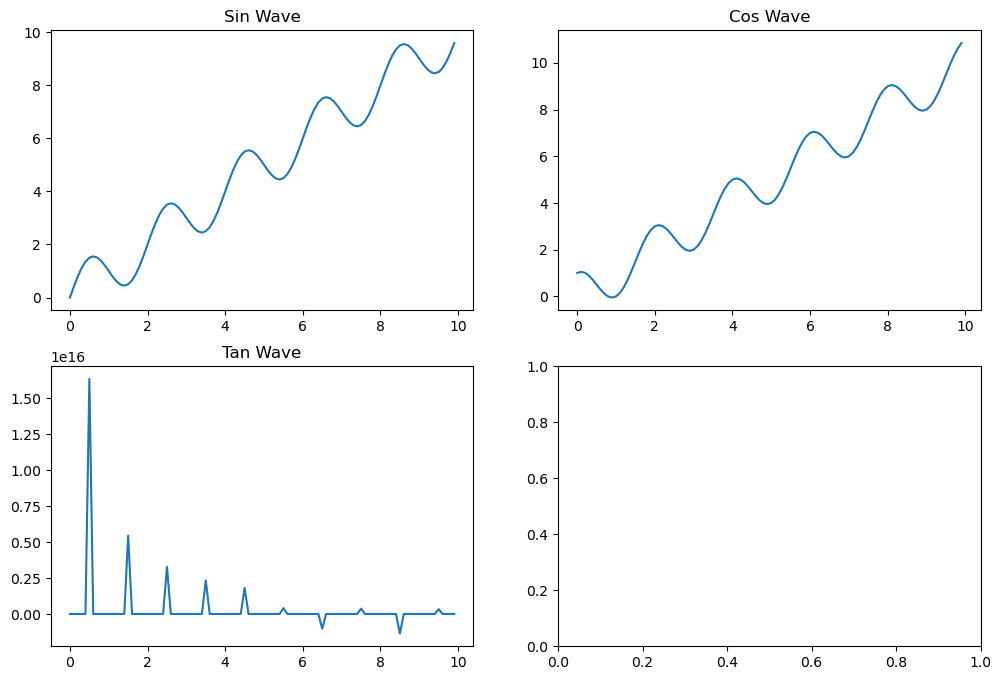

In [76]:
import numpy as np
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 


#intialising x and y values
x = np.arange(0, 10, 0.1) 
y = np.sin(np.pi * x) + x 

#To create a 2*2 suplots
fig,axs = plt.subplots(2,2,figsize=(12,8))

#creating sin wave
axs[0,0].plot(x,y)
axs[0,0].set_title('Sin Wave')

#creating cos wave
y = np.cos(np.pi * x) + x 

axs[0,1].plot(x,y)
axs[0,1].set_title('Cos Wave')

#creating tan wave
y = np.tan(np.pi * x) + x 

axs[1,0].plot(x,y)
axs[1,0].set_title('Tan Wave')

#creating Random wave
y = np.rand(np.pi * x) + x 

axs[1,1].plot(x,y)
axs[1,1].set_title('Log Wave');

### Question#43 Give Distribution chart of max Killip_grade

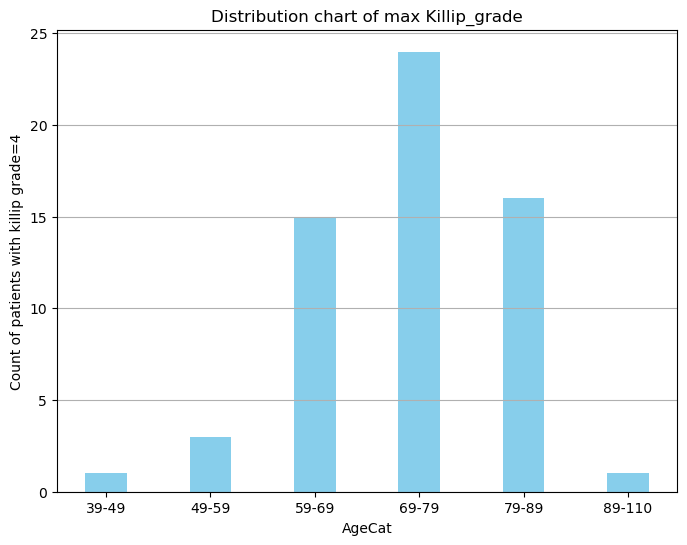

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 

# merging CardiacComplications and demography datasets
df_kill =df1.merge(df5,on='inpatient_number')

# creating a new dataframe df_agpul with only he columns inpatient_number, pulse, ageCat
df_kill = df_kill.loc[:,['inpatient_number','Killip_grade','ageCat']]

#getting only the rows with killip_grade=4, which is the max value
df_kill = df_kill.loc[df_kill['Killip_grade'] == 4,:]
df_kill.head()

#counting for each age categ and then sorting
df_kill_agecat= df_kill.ageCat.value_counts().reset_index()
df_kill_agecat = df_kill_agecat.sort_values('ageCat')
df_kill_agecat

#creating a bar graph between age categ and their killip counts
plt.figure(figsize=(8, 6))
bars1=plt.bar(df_kill_agecat['ageCat'], df_kill_agecat['count'], width=0.4, label='Value1', color='skyblue')
plt.title('Distribution chart of max Killip_grade')
plt.xlabel('AgeCat')
plt.ylabel('Count of patients with killip grade=4')
plt.grid(axis='y')

#for bars in bars1:
#       height = bar.get_height()
#       plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

### Question#45 Create a dataframe with date and time as columns, where the values are the admission time

In [36]:
#creating a dataframe using Admission_date variable from Hospitalization_Discharge
df_date = pd.DataFrame({'Adm_date_tm':df0['Admission_date']})
df_date['date'] = df_date['Adm_date_tm'].dt.date
df_date['time'] = df_date['Adm_date_tm'].dt.time
df_date.head()


,Adm_date_tm,date,time
0,2017-01-24,2017-01-24,00:00:00
1,2017-05-05,2017-05-05,00:00:00
2,2016-11-18,2016-11-18,00:00:00
3,2017-10-02,2017-10-02,00:00:00
4,2019-11-17,2019-11-17,00:00:00


### Additional Question #To calculate the re-admission date using the Admission date and readmission_time_days_from_admission

In [72]:
import numpy as np
# To calculate the re-admission date using the Admission date and readmission_time_days_from_admission

#Extracting only the Admission date and readmission_time_days_from_admission from the Hospitalization_Discharge dataset
df_re_dt=df0.loc[:,['Admission_date','readmission_time_days_from_admission']]

#Converting readmission_time_days_from_admission to days
df_re_dt.readmission_time_days_from_admission = pd.to_timedelta(np.where(df_re_dt.readmission_time_days_from_admission.isna(),0,df_re_dt.readmission_time_days_from_admission),'D')

#Adding with days to the Admission date
df_re_dt['Readmission date'] = df_re_dt.Admission_date + pd.to_timedelta(df_re_dt.readmission_time_days_from_admission, 'D')
                       
df_re_dt.head()


,Admission_date,readmission_time_days_from_admission,Readmission date
0,2017-01-24,0 days,2017-01-24
1,2017-05-05,0 days,2017-05-05
2,2016-11-18,0 days,2016-11-18
3,2017-10-02,19 days,2017-10-21
4,2019-11-17,0 days,2019-11-17


### Question#46 Convert occupation into numeric by Label encoding


In [95]:
#importing LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

#Create an instance of LabelEncoder() and store it in labelencoder variable/object le
lbl_enc = LabelEncoder()

#Apply fit for the occupation column
df5.occupation=lbl_enc.fit_transform(df5.occupation)


distinct_occu = df5.occupation.value_counts(dropna=False)
distinct_occu

occupation
2    1670
3     198
1      89
5      27
4      17
0       7
Name: count, dtype: int64